# Iris Flower Classification (Python)
### KNN Analysis of Iris Flowers using Python

+ Raul Eulogio

### Project Summary 
#### Abstract

(I basically copied the entire project from <a href='wwww.inertia7.com'> Inertia7 </a> which can be found here: http://www.inertia7.com/projects/iris-classification-r/, because I need to practice/get better at **Python**)
This project focuses on the classification of iris flowers into their respective species by using the K-Nearest Neighbors machine-learning algorithm. The three species in this classification problem include setosa, versicolor, and virginica. The explanatory variables include sepal length, sepal width, pedal length, petal width. See sepal wiki. See petal wiki. We are essentially trying to predict the species of the iris flower based on physical features!

The K-Nearest Neighbor algorithm is interesting because it is a simple yet powerful a machine learning method used for classification. It predicts based on majority votes, measuring a certain number of neighboring observation points (k) and classifies based on attribute prevalence using Euclidean distance.

## 1. Load Modules
First we load the appropriate modules into our python environment/idle/whatever its called.

In [1]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from urllib.request import urlopen

plt.style.use('ggplot')

## 2. Get Data
The iris dataset is very popular in statistical learning, and is readily available in the UCI database. We call up the data set using `urllib` module and input into a `pandas DataFrame`.

In [2]:
# HEAVILY INFLUENCED Jason's Python Tutorials
UCI_data_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

iris = pd.read_csv(urlopen(UCI_data_URL), 
                   names = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species'])
iris.head(6)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


Our terminal output above shows six observations of our data. We can appreciate a total of five variables. The goal is to predict species as a function of the other four variables.

Next we do exploratory analysis.

## 3. Exploratory Analysis
We begin our exploratory analysis by looking for relationships across our explanatory and predicted variables. For this, we use `matplotlib` to  generate scatterplots of the `Sepal.Length` (y-axis) and `Sepal.Width` (x-axis), and the `Petal.Length` (y-axis) and `Petal.Width` (x-axis).

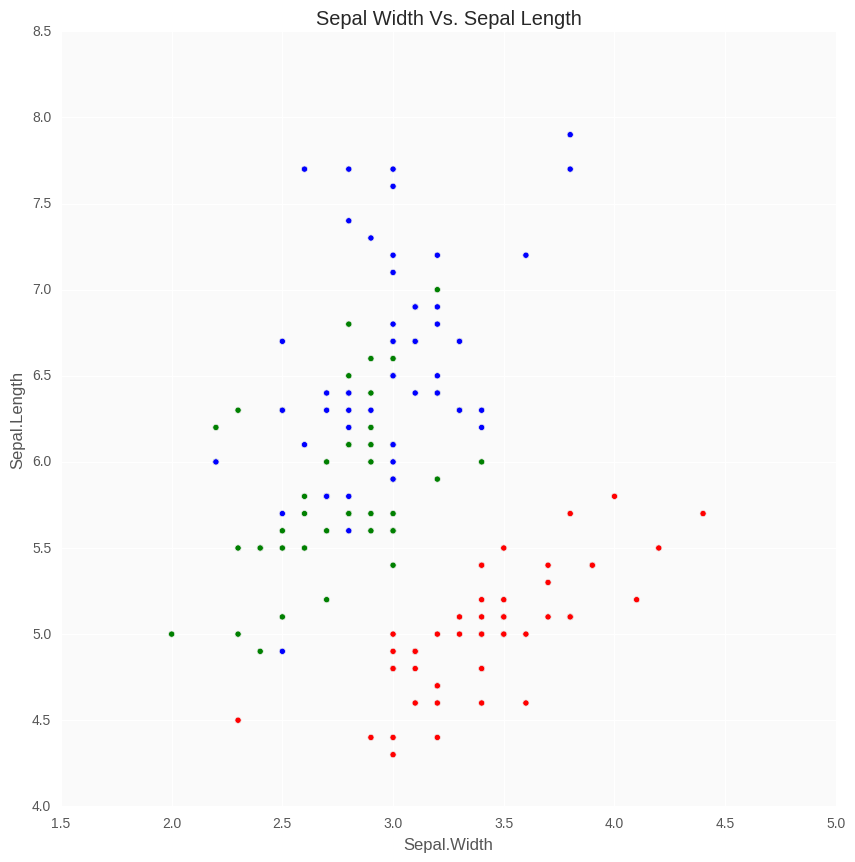

In [3]:
fig, ax = plt.subplots(figsize=(10, 10))

# REFERENCE (SINCE COULDN'T FIND WAY TO DO USING JUST simple matplotlib commands): 
# http://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

ax.set_axis_bgcolor('#fafafa')

plt.title("Sepal Width Vs. Sepal Length")
plt.ylabel("Sepal.Length")
plt.xlabel("Sepal.Width")

plt.scatter(iris['Sepal.Width'], iris['Sepal.Length'], 
            c = iris['Species'].apply(lambda x: colors[x]))
plt.show()

Next we plot the `Petal.Length` vs the `Petal.Width`!

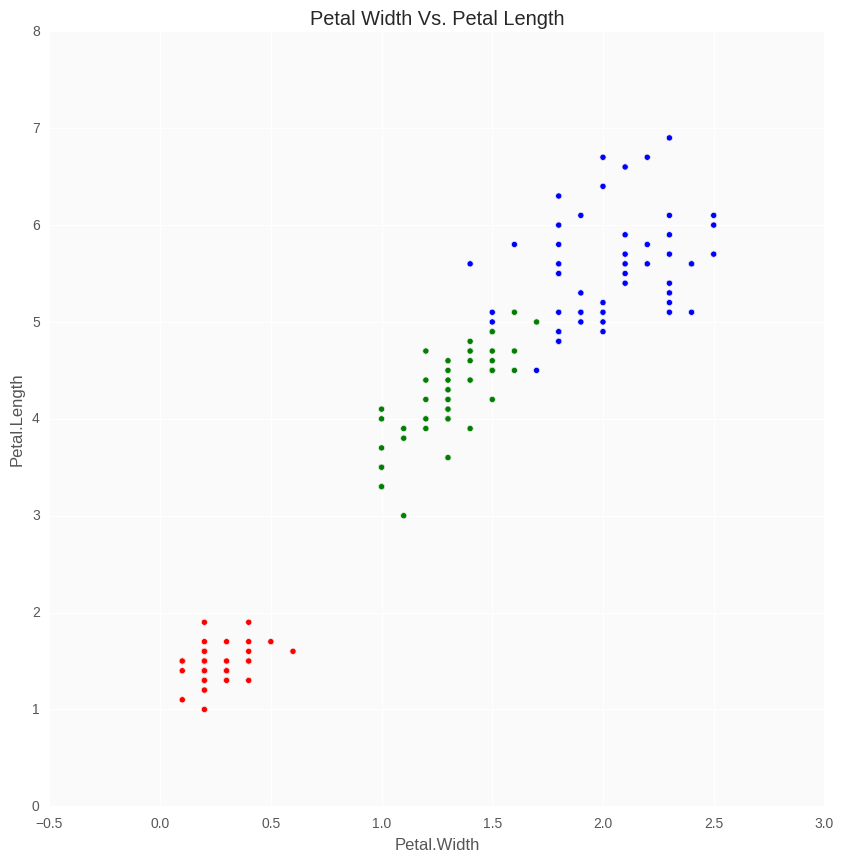

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

# REFERENCE (SINCE COULDN'T FIND WAY TO DO USING JUST simple matplotlib commands): 
# http://stackoverflow.com/questions/26139423/plot-different-color-for-different-categorical-levels-using-matplotlib
colors = {'Iris-setosa':'red', 'Iris-versicolor':'green', 'Iris-virginica':'blue'}

ax.set_axis_bgcolor('#fafafa')

plt.title("Petal Width Vs. Petal Length")
plt.xlabel("Petal.Width")
plt.ylabel("Petal.Length")

plt.scatter(iris['Petal.Width'], iris['Petal.Length'], 
            c = iris['Species'].apply(lambda x: colors[x]))
plt.show()

 The plots below shows **Setosa** to be most distinguisable of the three species with respect to both **Sepal** and **Petal** attributes. We can infer then that the setosa species will yield the least prediction errors, while the other two species, **Versicolor** and **Virginica**, might not.

Below is a plot that shows the relationships across our various explanatory variables.

/home/rxe/anaconda3/envs/puto/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


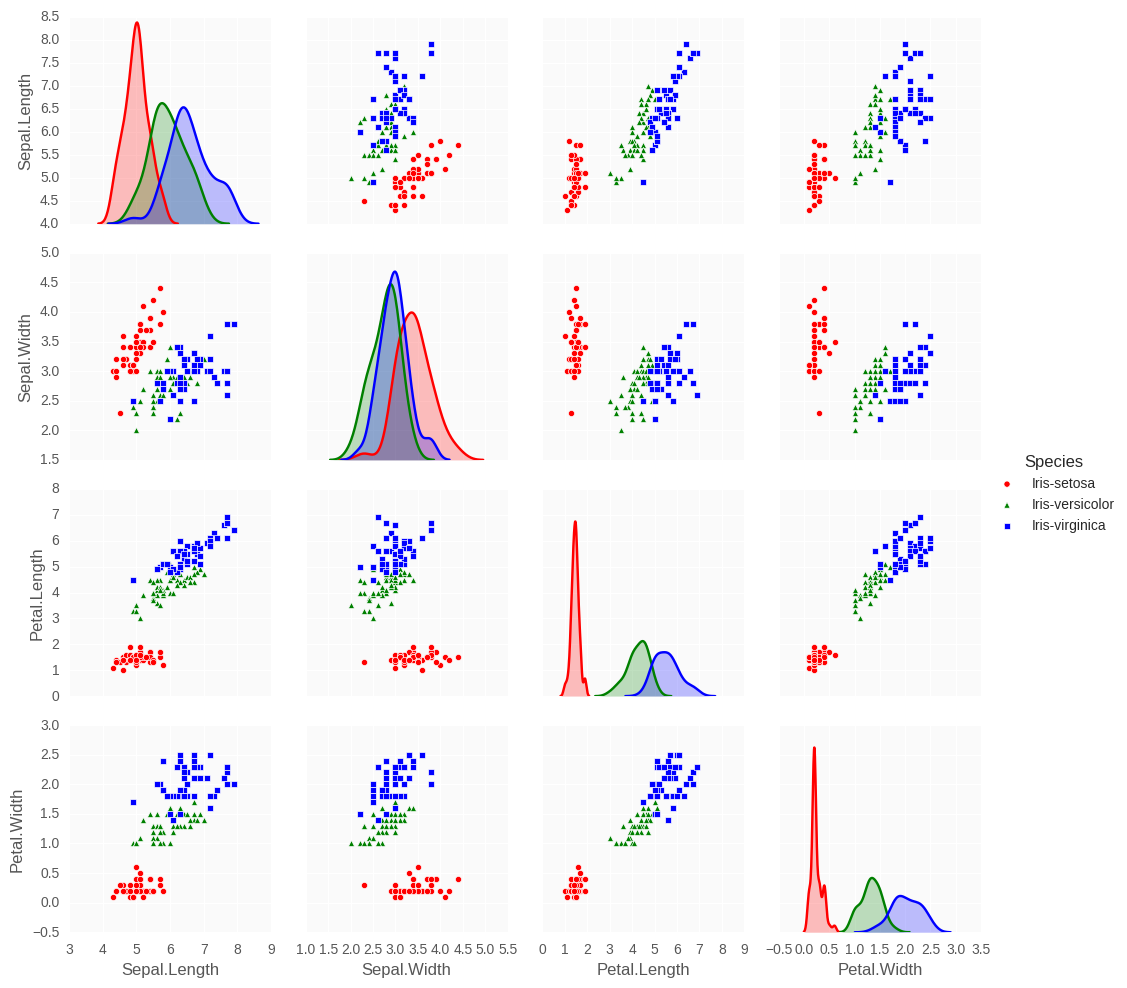

In [5]:
sns.set_palette(palette = ('Red', 'Green', 'Blue'))
pairsPlot = sns.pairplot(iris, hue = 'Species', diag_kind = 'kde', markers = ['o', '^', 's'], 
                         diag_kws=dict(shade=True))
pairsPlot.set(axis_bgcolor='#fafafa')

plt.show()

This plot reduces the dimensions and gives an overarching view of the interactions of the different attributes. This plot will be handy for other classification models like **Linear Discrimant Analysis** which is not in this project but we included more statistical process on Iris in the Github respository.

## 4. Model Estimation
The K-Nearest Neighbor algorithm predicts based on majority votes, measuring a certain number of neighboring observation points (k) and classifies based on attribute prevalence using Euclidean distance. 



In [6]:
iris.set = iris.iloc[:, :4]
iris.set.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
train, test = train_test_split(iris, test_size = 0.25)

train_set = train.iloc[:, :4]
class_set  = train.iloc[:, 4:]

test_set = test.iloc[:, :4]
test_class_set = test.iloc[:, 4:]
print("Here is the length of our train set:")
print(train_set.shape)

print("Here is the length of our test set:")
print(test_set.shape)

Here is the length of our train set:
(112, 4)
Here is the length of our test set:
(38, 4)


In [8]:
kNN = neighbors.KNeighborsClassifier()

kNN.fit(train_set, class_set['Species'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Now that we fit the model let's predict the **Species** for the `train_set`.

In [9]:
predictionsTrain = kNN.predict(train_set)
pd.crosstab(predictionsTrain, class_set['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,38,0,0
Iris-versicolor,0,33,1
Iris-virginica,0,2,38


## Training Error Rate 
We calculate the **training error rate** as such:

In [10]:
# Total Number of observations is 112 
# Total Number of observations predicted incorrectly is 3
print("The test error rate for our model is:")

print('%.5f' % (3/112))

The test error rate for our model is:
0.02679


We receive a **training error rate** of **0.02679** which shows that our model did fairly well, but we are more concerned with using our model against our **test set** since this will give us more indication if we are **over fitting** and whether it performs just as well with data the model hasn't seen.

Our training set did relatively well let's try our `test_set` now:

In [11]:
predictions = kNN.predict(test_set)

print(predictions[:6])
print(test_class_set.head())

['Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa']
             Species
76   Iris-versicolor
124   Iris-virginica
53   Iris-versicolor
6        Iris-setosa
130   Iris-virginica


In [12]:
pd.crosstab(predictions, test_class_set['Species'])

Species,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,12,0,0
Iris-versicolor,0,14,0
Iris-virginica,0,1,11


Here we output the mean accuracy on the `test_set` and `test_class`.
Which is helpful but we're more concerned with finding the **test error rate**

In [13]:
accuracy = kNN.score(test_set, test_class_set['Species'])
accuracy

0.97368421052631582

## Test Error Rate

In [14]:
# Total Number of Observations is 38
# Total Number of observations predicted incorrectly is 2
print("The test error rate for our model is:")

print('%.5f' % (1/38))

The test error rate for our model is:
0.02632


## 6. Conclusions
Our model yielded **test error rates is 0.02632** for the three different species, not bad! As this project shows, **K-Nearest Neighbors** modeling is fairly simple. For datasets with a small amount of variables **kNN** is a viable method, but for datasets with many variables we run into the curse of dimensionality. Check this <a href='http://stats.stackexchange.com/questions/65379/machine-learning-curse-of-dimensionality-explained'>stack exchange </a> article for an explanation on the curse of dimensionality. We feel like this project is a good intro to training and test sets which are very important components not just to data science but to statistical learning overall!